# Lecture 1

## Temporal Data Structures (Resume notes at 20 mins)

### Models of Computation

#### The Pointer Machine

The starting point, and the one being used in this lecture, is called the [pointer machine](https://en.wikipedia.org/wiki/Pointer_machine). It's an old one, from the 80s. It corresponds to what you might think about if you've done a lot of object oriented programming and this is somewhat poetic because I'm going to be exploring the concept of the pointer machine with... *object oriented programming*! 

You have a bunch of nodes... they have a constant number of fields in them. You can think of these as objects in an OO language or structs in C, or reason about them using the model developed in this notebook. Each field could be a pointer to another node, it could be a null pointer, or it could have some data in it. You can have a pointer to yourself, or a pointer back to the record which pointed at you.

You can think of this as the memory model.

In order to reason about this with Python...

In [25]:
%matplotlib inline
# Note that `%matplotlib notebook` doesn't seem to work with NetworkX graphs.

import matplotlib.pyplot as plt
import networkx as nx

# Each node can contain up to 8 fields and has a label to make our renderings nicer.
class Node():
    def __init__(self, label):
        self._label = label

    def __str__(self):
        return self._label

# We're going to create a very simple pointer machine capable of holding 32 nodes.
class PointerMachine():
    def __init__(self):
        self.nodes = []

machine = PointerMachine()

#### Operations

This is the computation part of the model. You can use it to create new nodes:

    x = new node
    
You can look at fields:

    x.field
    
You can set fields:

    x.field = y
    
You can compute on data:

    x = y + z
    x = z - y

This model is more about how everything is organized in memory and not so much about what you're allowed to do to the data items. In this lecture, it won't matter what you're doing to the data items. We'll never really touch them, we just copy them around. 

There is going to be one node in your data structure, or in memory, called the **root node**. 

You're always working relative to the root node and you can manipulate all nodes via the root.

**Many data structures, particularly classic data structures, follow a pointer machine model.**

What we'd like to do is transform that data structure and make a new pointer machine data structure that does extra cool things. Namely, travel through time.

### Types of Temporal Structures

#### 2.) Retroactivity
Lecture two covers retroactivity.

Retroactivity is more like Back to The Future. You can go back and make a change, then return to the present and see what happened. This is much harder to do.

## Persistence

Persistence is the **branching universe time travel model**, where if you make a change in the past you get a new universe. You never destroy old universes. The general goal of persistence is to remember everything. And by everything, I mean different versions of the data structure. Data structures in general have update operations and query operations, we're mainly concerned about updates here. Every time you do an update, you can think of it as taking a version of the data structure and making a new one. You never want to destroy old versions. Even though an operation such as an insert may change a data structure, we want to remember the past state as well.

All data structure operations are relative to a specified version. An update creates and returns a new version. So when you do an update, you specify a version of the data structure and the data you want to insert... and the output is a new version. 

### Levels of Persistence

#### 1.) Partial Persistence

This is the easiest to obtain. In partial persistence, you are only allowed to update the latest version. This means that versions are linearly ordered. What this allows is looking back at old versions and querying them, but you cannot change them - you can only change the most recent version.

#### 2.) Full Persistence

In full persistence, you can look back and update any version you want. The versions, then, form a tree. Updating a previous version creates a new branch of the tree, and any version can be branched. This is why it is called the branching universe model. When you update, you branch. No version ever gets destroyed and you can query all versions, but unlike partial persistence you can also update any version, which returns a new version.

#### 3.) Confluent Persistence

In confluent persistence, you can combine two versions to create a new version. In this case, again, you can't destroy old versions... whenever you branch your universe, you form a directed acyclic graph. 

What does **combine** mean? That depends on your data structure. If you have two linked lists or binary search trees, you can concatenate them... that's an easy operation. For other data structures, this is an open problem and it is unclear if it can even be done. 

#### 4.) Functional Persistence

This is immutable - you can never modify anything. In a functional data structure, you're not allowed to modify anything ever, all you can do is make new nodes. This is constraining and you can't always get optimal running times in the purely functional world, but if you can get a purely functional data structure you get everything from items 1-3 for free. 

## Data Structure Examples

### Partial Persistence

Any pointer machine data structure with a constant O(1) number of pointers both **to and from** a given node can be made partially persistent with O(1) multiplicative overhead and O(1) space per change. 

#### Proof!

##### 1.) Store back pointers for the latest version.

The idea is pretty simple. For each node, we want to have a back pointer which shows where the node came from. If there are $p$ pointers, there will be $p$ back pointers. Still constant, still using the pointer machine model. 

##### 2.) Store $2p$ modifications to fields of data structure. 


In Python terms...

In [21]:
# Insert implementation of partial persistence structure!

from collections import namedtuple 

namedtuple('Modification', 'field version value')

### Full Persistence


With partial persistence, we have a tree and with full persistence, we're going to create a line... or you can think of it as **linearizing the tree**. When in doubt, cheat. 

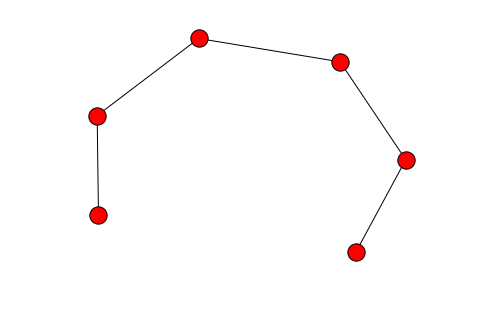

In [27]:
# This may be helpful to visualize what I'm talking about here.
nodes = [Node(l) for l in ["A","B","C","D","E","F"]]
edges = [(0,1),(1,2),(2,3),(3,4),(4,5)]

G = nx.Graph()
for i,j in edges:
    G.add_edge(nodes[i], nodes[j])

nx.draw(G)
plt.show()